In [36]:
import tensorflow as tf 
import numpy as np 

g = tf.Graph()
with g.as_default():


    tf.set_random_seed(123)
    
    tf_x = tf.placeholder(shape= (None),
                          dtype = tf.float32,
                          name = "tf_x")
    
    tf_y = tf.placeholder(shape = (None),
                          dtype = tf.float32,
                          name = "tf_y")
    
    
    weight = tf.Variable(
        tf.random_normal(shape = (1,1), stddev = 0.25),
        name = "weight"
    )
    
    bias = tf.Variable(0.0,name = "bias")
    
    
    y_hat = tf.add(weight * tf_x, 
                   bias, 
                   name = "y_hat"
            )
    
    cost = tf.reduce_mean(
        tf.square(tf_y - y_hat),
        name = "cost"
    )
    
    optim = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
    
    train_op = optim.minimize(cost,name = "train_op")
    
    saver = tf.train.Saver()
    
    

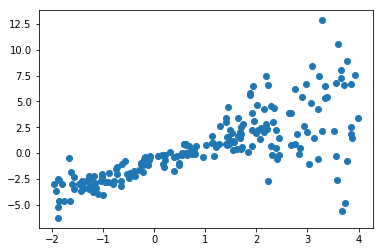

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low = -2, high = 4, size = 200)
    y = []
    
    for t in x:
        r = np.random.normal(loc = 0.0,
                             scale = (0.5 + t* t / 3 ),
                             size = None)
        y.append(r)
        
    return x,1.726 * x - 0.84 + np.array(y)

x, y = make_random_data()
plt.plot(x,y ,"o")
plt.show()

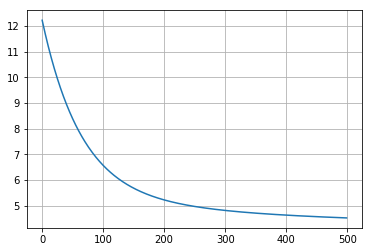

In [37]:
x_train, y_train = x[:100],y[:100]

x_test, y_test = x[100:],y[100:]

n_epochs = 500

training_costs = []

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(n_epochs):
        c, _ = sess.run([cost,train_op],
                        feed_dict = {
                            tf_x: x_train,
                            tf_y: y_train
                       })
        training_costs.append(c)
    saver.save(sess, './trained-model')
         
            
plt.plot(training_costs)
plt.grid(True)
plt.show()

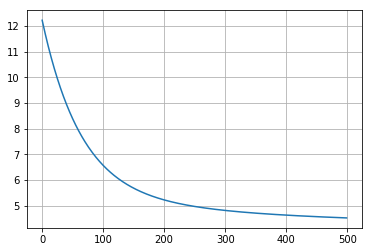

In [38]:
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(n_epochs):
        c, _ = sess.run(["cost:0","train_op"],
                        feed_dict = {
                            "tf_x:0": x_train,
                            "tf_y:0": y_train
                       })
        
        training_costs.append(c)



plt.plot(training_costs)
plt.grid(True)
plt.show()

INFO:tensorflow:Restoring parameters from ./trained-model


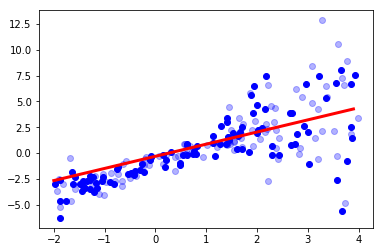

In [39]:
import matplotlib.pyplot as plt

x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
   
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0' : x_arr})

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()